# Desafio do Crédito

A implementação de ciências de dados em instituições bancárias já [é uma realidade](https://datafloq.com/read/how-big-data-changing-banking-finance-credits/4557). Com equipes cada vez mais qualificadas e algorítimos cada vez mais poderosos, o uso de dados pode ter [diferentes utilidades](https://itforum365.com.br/bancos-estao-aumentando-o-uso-da-inteligencia-artificial-saiba-para-que/) dentro da instituição, sendo a análise de crédito e prevenção de fraudes duas das mais importantes aplicações.

Em meio a crise global que vivemos em 2020 a [procura por crédito se intensificou](https://g1.globo.com/economia/noticia/2020/04/16/com-pandemia-busca-por-emprestimos-cresce-mas-credito-bancario-segue-restrito-e-caro.ghtml) e, junto à ela, o risco da instituição ao fornecer, já que atravessamos um período de instabilidade internacional. Todo este cenário só reforça a necessidade e importância dos setores de inteligências em instituições bancárias e de crédito.

![Imgur](https://i.imgur.com/fNeHPe7.jpg)
<a href="https://www.freepik.com/free-photos-vectors/business">Business vector created by freepik - www.freepik.com</a>

Neste projeto, vamos trabalhar com um conjunto de dados de fraude/inadimplência oriundo de uma instituição fictícia. O objetivo deste trabalho é construir um modelo capaz de prever com razoável eficiência se determinada operação resultará em fraude/inadimplência ou não. Para isso,  o trabalho se dividirá nas seguintes etapas:

* Análise exploratória de dados;

* Limpeza de dados;

* Treinamento do modelo;

* Avaliação do modelo;

* Implementação do modelo.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Análise e Limpeza dos Dados

Dando início ao projeto, vamos primeiramente conhecer e tratar os dados que temos a disposição.

Vamos começar importando as bibliotecas para manipulação e visualização de dados. Em seguida, vamos configurar o notebook, ler os dados em um dataframe a imprimar as 5 primeiras linhas.


In [2]:
# Importando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o notebook
sns.set()
%matplotlib inline
pd.options.display.max_columns = None

# Lendo os dados
desafio = pd.read_csv('/content/drive/My Drive/Colab Notebooks/desafio_de_crédito.csv', sep=';')
desafio.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,default,risk,var_a,var_b,var_c,var_d,var_e,var_f,borrowed,months,limit,reason,income,sign,sex,social_network,state,zipcode,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,77a10088-92d9-62a3-defb-4b63b6f28805,False,0.30,340.0,938.721.500.714,0.777031064984,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,103.040.444.721,11017.37,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100007.72,libr,m,False,1DpYl6dtzY0qE33poow3iw==,8qgxecfbVQrBbH6hc6MigQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,8.0,NaN
1,26a68732-a660-8cf9-340d-34c88ecdcbf0,False,0.25,470.0,10.351.860.486.700.000,0.0825953142292,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,102.477.202.085,18018.63,36.0,34819.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,64032.34,gemi,m,True,xsd3ZdsI3356I3xMxZeiqQ==,YA0xaBEZG4n6CnDMX82V+w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiEdi2...,n+xK9CfX0bCn77lClTWviw==,16.0,0.0,0.0,10.0,9.0
2,fd228aa8-5a67-6561-4382-21c35360c01d,False,0.17,360.0,102.932.536.179,0.9801415171760001,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,10.916.292.020.600.000,14016.94,36.0,34558.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65035.38,cance,m,False,fR2lwAMjCb/fNXjsApiOTw==,rvdltYNojzCjA1gRsbX9fA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,19.0,0.0,0.0,20.0,20.0
3,083ca221-7f4e-21c7-204d-2962c3ca9c14,False,0.21,280.0,102.874.612.898,0.561958248063,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,11.491.395.262.700.000,7163.14,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,31039.94,scor,m,False,82aTqSzrTImY+SbAOBQzGQ==,ap0+SDtWtPxkoUtdv9Jixw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,1.0,0.0,4.0,4.0
4,a390d111-8c65-6e1f-9566-91d815e9a4a1,True,0.39,150.0,978.452.489.885,0.152126271846,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,114.350.342.736,9027.82,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,120011.02,NaN,m,NaN,BB/zpwTH+8GCIVHlhzOU1Q==,iY2cULhh/NFBaiOCRferZQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,16.0,0.0,0.0,14.0,NaN


Vamos utilizar os métodos `describe` e `info` para termos acesso a mais informações sobre o dataset.


In [3]:
desafio.describe(include='all')

,id,default,risk,var_a,var_b,var_c,var_d,var_e,var_f,borrowed,months,limit,reason,income,sign,sex,social_network,state,zipcode,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,64592,59966,63807.000000,63807.000000,64592,64592,63807,63807,64592,63807.000000,63807.000000,44839.000000,63801,6.380700e+04,43825,57406,58185,63807,63807,63807,59797,63807,26554.000000,63605.000000,63789.000000,63807.000000,48141.000000
unique,64592,2,NaN,NaN,64592,64592,7,35,64592,NaN,NaN,NaN,20345,NaN,12,2,2,50,830,1,44604,5,NaN,NaN,NaN,NaN,NaN
top,1c6e528f-ceaf-a92a-8d18-a278751caf7b,False,NaN,NaN,102.500.248.323,0.0554244110831,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,10.835.839.343.399.900,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,NaN,libr,m,False,xsd3ZdsI3356I3xMxZeiqQ==,3k2JCQ8Bp5oDwaI39ZJgHA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,NaN,NaN,NaN,NaN
freq,1,50456,NaN,NaN,1,1,21029,5202,1,NaN,NaN,NaN,6510,NaN,5810,38894,35824,10656,813,63807,244,32105,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.296404,348.031877,NaN,NaN,NaN,NaN,NaN,13853.282850,41.835347,34562.007560,NaN,7.180972e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.174249,0.076959,0.004703,10.681164,11.044847
std,NaN,NaN,0.101549,110.064626,NaN,NaN,NaN,NaN,NaN,8105.662643,10.295568,37041.867093,NaN,5.124993e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.663679,0.277000,0.079048,4.583902,4.576030
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,527.070000,36.000000,0.000000,NaN,4.821180e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.220000,270.000000,NaN,NaN,NaN,NaN,NaN,7762.945000,36.000000,10000.000000,NaN,4.501336e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,0.000000,0.000000,7.000000,8.000000
50%,NaN,NaN,0.290000,340.000000,NaN,NaN,NaN,NaN,NaN,12023.680000,36.000000,25775.000000,NaN,6.139916e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,0.000000,0.000000,10.000000,10.000000
75%,NaN,NaN,0.360000,420.000000,NaN,NaN,NaN,NaN,NaN,19384.815000,36.000000,47326.500000,NaN,8.602645e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000,0.000000,13.000000,14.000000


In [4]:
desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 64592 non-null  object 
 1   default            59966 non-null  object 
 2   risk               63807 non-null  float64
 3   var_a              63807 non-null  float64
 4   var_b              64592 non-null  object 
 5   var_c              64592 non-null  object 
 6   var_d              63807 non-null  object 
 7   var_e              63807 non-null  object 
 8   var_f              64592 non-null  object 
 9   borrowed           63807 non-null  float64
 10  months             63807 non-null  float64
 11  limit              44839 non-null  float64
 12  reason             63801 non-null  object 
 13  income             63807 non-null  float64
 14  sign               43825 non-null  object 
 15  sex                57406 non-null  object 
 16  social_network     581

A partir dos outputs acima, concluímos que algumas colunas não serão úteis para a análise e, portanto, serão excluídas. De forma geral, estas colunas contém dados categóricos com uma quantidade muito alta de dados distintos ao longo da coluna ou com apenas o mesmo dado em todas as linhas.

Portanto, vamos utilizar o método `drop` e eliminar tais colunas.


In [5]:
desafio.drop(labels=['id', 'var_b', 'var_f', 'reason', 'zipcode', 'channel', 'job_name'], axis=1, inplace=True)
desafio.head()

,default,risk,var_a,var_c,var_d,var_e,borrowed,months,limit,income,sign,sex,social_network,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,False,0.30,340.0,0.777031064984,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,11017.37,36.0,NaN,100007.72,libr,m,False,1DpYl6dtzY0qE33poow3iw==,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,8.0,NaN
1,False,0.25,470.0,0.0825953142292,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,18018.63,36.0,34819.0,64032.34,gemi,m,True,xsd3ZdsI3356I3xMxZeiqQ==,n+xK9CfX0bCn77lClTWviw==,16.0,0.0,0.0,10.0,9.0
2,False,0.17,360.0,0.9801415171760001,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,14016.94,36.0,34558.0,65035.38,cance,m,False,fR2lwAMjCb/fNXjsApiOTw==,n+xK9CfX0bCn77lClTWviw==,19.0,0.0,0.0,20.0,20.0
3,False,0.21,280.0,0.561958248063,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,7163.14,36.0,0.0,31039.94,scor,m,False,82aTqSzrTImY+SbAOBQzGQ==,N5/CE7lSkAfB04hVFFwllw==,NaN,1.0,0.0,4.0,4.0
4,True,0.39,150.0,0.152126271846,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,9027.82,36.0,NaN,120011.02,NaN,m,NaN,BB/zpwTH+8GCIVHlhzOU1Q==,n+xK9CfX0bCn77lClTWviw==,16.0,0.0,0.0,14.0,NaN


A coluna `var_c`, no entanto, merece mais atenção. Apesar de parecer conter valores decimais,  ela está armazenada como texto. Vamos tentar convertê-la para decimais.

In [6]:
desafio['var_c'] = desafio['var_c'].astype(float)

ValueError: ignored

Verificamos, através o `ValueError` que existe pelo menos uma linha onde o valor foi armazenada em notação científica e, por isso o `pandas` entendeu a coluna como texto. Vamos verificar e quantas outras linha isso ocorre. 

In [8]:
desafio['var_c'][desafio['var_c'].str.contains(',', na=False)]

21779    3,54E+06
33650    6,40E+06
Name: var_c, dtype: object

O problema o ocorre em apenas duas linhas. Vamos utilizar uma função `lambda` para corrigir o erro. Em seguida, vamos verificar se ainda existem linha erradas.

In [9]:
# Corrigindo os valores
desafio['var_c'] = desafio['var_c'].apply(lambda x: float(x.replace(',', '.')[:4]) * 10**6 if ',' in x else x)

# Verificando se o problema ainda existe
desafio['var_c'][desafio['var_c'].str.contains(',', na=False)]

Series([], Name: var_c, dtype: object)

Como podemos ver, não existem mais valores errados.

Por fim, vamos converter os valores para decimais.

In [10]:
desafio['var_c'] = desafio['var_c'].astype(float)

O próximo passo na limpeza dos dados é lidar com valores ausentes.Primeiramente, vamos verificar o percentual de valores ausentes em cada coluna.

In [11]:
round((desafio.isnull().sum() / desafio.shape[0] * 100), 2).sort_values(ascending=False)

ok_since             58.89
sign                 32.15
limit                30.58
n_issues             25.47
sex                  11.13
social_network        9.92
default               7.16
n_bankruptcies        1.53
n_defaulted_loans     1.24
state                 1.22
real_state            1.22
n_accounts            1.22
months                1.22
borrowed              1.22
var_e                 1.22
var_d                 1.22
var_a                 1.22
risk                  1.22
income                1.22
var_c                 0.00
dtype: float64

Vemos que a grande maioria das colunas possuem valores nulos. Apenas 4 delas, no entanto, possui mais de dez por cento de valores nulos.

Vamos plotar o um mapa de calor para verificar as correlações entre colunas e se existem colunas redundantes.

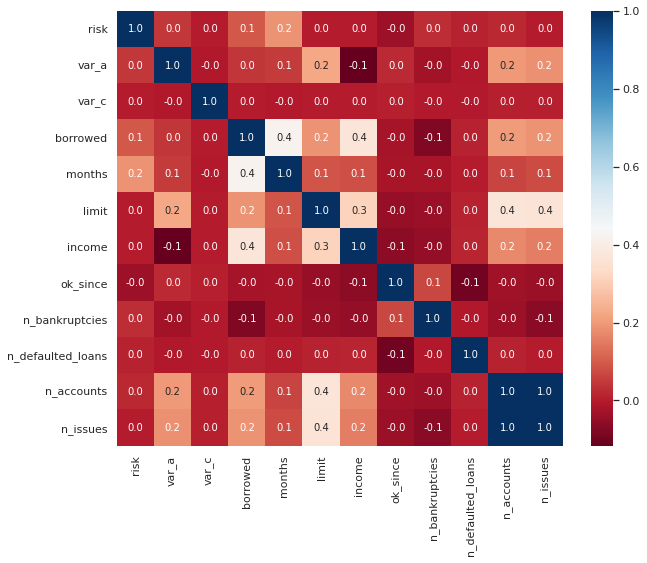

In [12]:
corr = desafio.corr()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu', fmt='.1f', linecolor='white', annot=True)
plt.show()

Apesar da grande maioria das colunas apresentar baixa correlação entre si, as colunas `n_issues` e `n_accounts`  tem correlação 1. Isso indica que estas colunas seriam redundantes em um modelo preditivo, portanto vamos excluir um delas. Como a coluna `n_issues` possui mais valores ausentes, elas será a excluída.

In [13]:
desafio.drop(labels=['n_issues'], axis=1, inplace=True)

E agora o percentual atualizado de valores nulos por coluna:

In [14]:
round((desafio.isnull().sum() / desafio.shape[0] * 100), 2).sort_values(ascending=False)

ok_since             58.89
sign                 32.15
limit                30.58
sex                  11.13
social_network        9.92
default               7.16
n_bankruptcies        1.53
n_defaulted_loans     1.24
var_e                 1.22
risk                  1.22
var_a                 1.22
var_d                 1.22
n_accounts            1.22
borrowed              1.22
months                1.22
state                 1.22
real_state            1.22
income                1.22
var_c                 0.00
dtype: float64

Percebe-se que varia colunas possuem o mesmo percentual de valores ausentes: 1,22%. Para confirmar isto, vamos plotar uma matriz de correlação de valores nulos Esta matrix indica a correlação entre as linha nulas de diferentes variáveis.

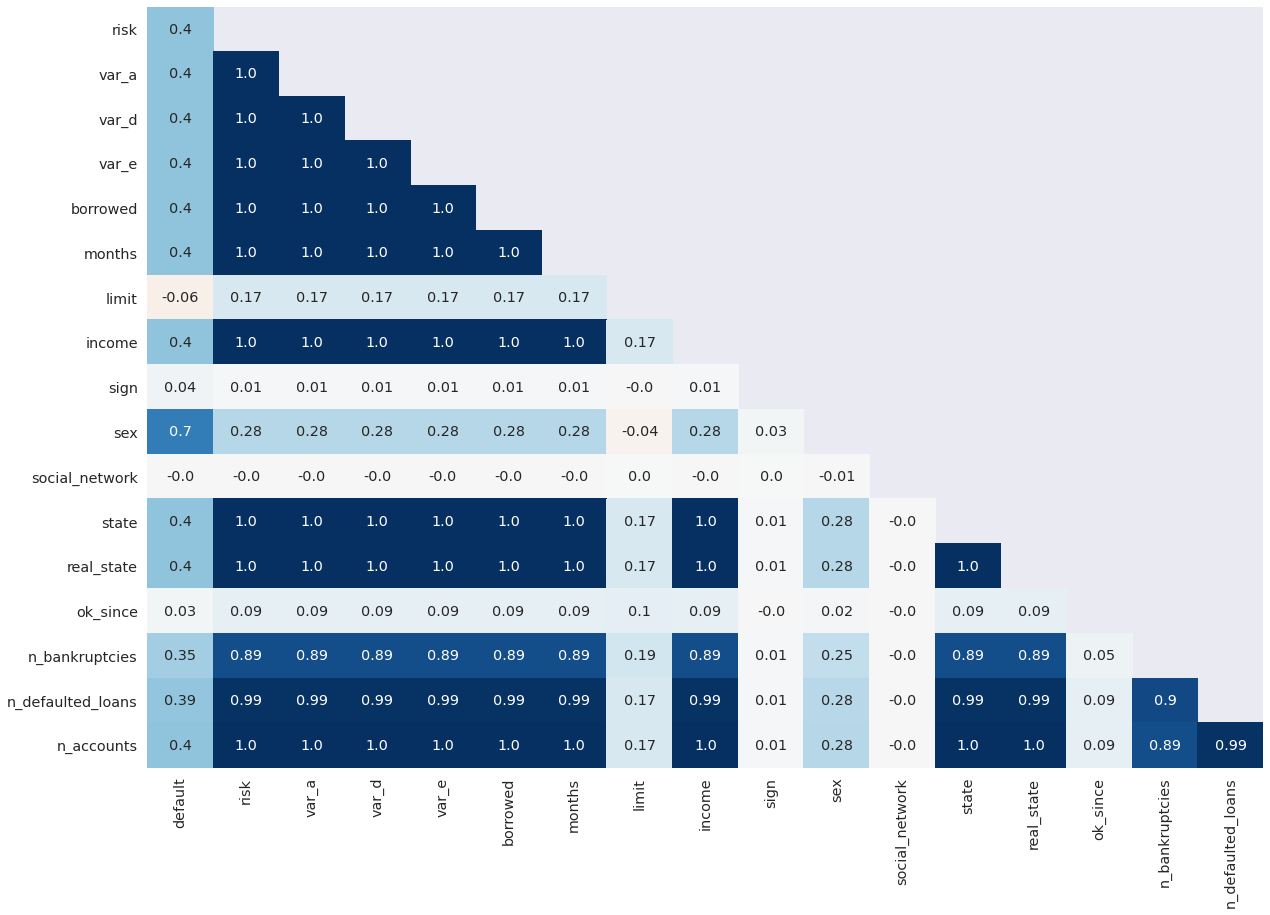

In [15]:
def plot_null_correlations(df):
    # Gera matriz de correlação apenas para colunas com pelo menos um valor nulo

    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
 
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    for text in ax.texts:
        t = float(text.get_text())
        text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
        
plot_null_correlations(desafio)

Esta matriz nos permite confirmar que todas as colunas com 1,22% de seus valores nulos, possuem estes valores nas mesmas linhas. Assim, estas linhas estão majoritariamente vazias.

Como estes valores representa apenas uma pequena fração do dataset, vamos excluí-los. Em seguida, vamos novamente verificar o percentual de nulos para cada coluna.

In [16]:
desafio.dropna(subset=['var_a'], axis=0, inplace=True)
round((desafio.isnull().sum() / desafio.shape[0] * 100), 2).sort_values(ascending=False)

ok_since             58.38
sign                 32.08
limit                29.73
sex                  10.14
social_network        9.93
default               6.02
n_bankruptcies        0.32
n_defaulted_loans     0.03
var_e                 0.00
risk                  0.00
var_a                 0.00
var_c                 0.00
var_d                 0.00
n_accounts            0.00
borrowed              0.00
months                0.00
state                 0.00
real_state            0.00
income                0.00
dtype: float64

O número de valores ausentes é agora bem menor.

Vamos focar nas colunas `n_bankruptcies` e `n_defaulted_loans` e tentar encontrar uma forma de preencher seus valores nulos. Para isso vamos utilizar o método `describe`. 

In [17]:
desafio.loc[:,['n_bankruptcies', 'n_defaulted_loans']].describe()

,n_bankruptcies,n_defaulted_loans
count,63605.000000,63789.000000
mean,0.076959,0.004703
std,0.277000,0.079048
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,6.000000,5.000000


Verificamos que cada uma dessas colunas possui 75% de seus valores iguais a zero. Ainda, a média de ambas é muito  próxima de zero. Os desvios padrões também são baixos.

Como o percentual de valores ausentes são muito baixos, vamos preenchê-los com zero.

In [18]:
desafio['n_bankruptcies'].fillna(value=0, inplace=True)
desafio['n_defaulted_loans'].fillna(value=0, inplace=True)

round((desafio.isnull().sum() / desafio.shape[0] * 100), 2).sort_values(ascending=False)

ok_since             58.38
sign                 32.08
limit                29.73
sex                  10.14
social_network        9.93
default               6.02
borrowed              0.00
risk                  0.00
var_a                 0.00
var_c                 0.00
var_d                 0.00
var_e                 0.00
n_accounts            0.00
months                0.00
n_defaulted_loans     0.00
state                 0.00
real_state            0.00
n_bankruptcies        0.00
income                0.00
dtype: float64

Antes de continuarmos com os valores ausentes, vamos primeiro lidar com as variáveis categóricas. Como muitas delas estão representadas por letras aleatórias, vamos transformá-las em valores categóricos numéricos, cada um representando um dos valores únicos na coluna. Para tanto, escrevemos una função que gera um dicionário a partir dos valores únicos de cada coluna. No dicionário, cada chave é um valor único e o valor correspondente à chave é o que será atribuído na colunac, similiar a uma variável dummie.


Com o dicionário pronto, a função transforma os valores na coluna através do método  `map`.

Com a função escrita, vamos criar uma lista com as colunas que serão afetada e iterar sobre ela, utilizando a função em cada coluna.

In [19]:
def categorical(column):
    # Transforma os valores nas colunas em dummies

    mapping = {}
    c = 0
    for value in column.unique():
        mapping[value] = c
        c += 1
    
    column = column.map(mapping)
    
    return column

# Criando uma lista com as colunas
cat_columns = ['var_d', 'var_e', 'state', 'real_state']

# Utilizando a função em cada coluna
for col in cat_columns:
    desafio[col] = categorical(desafio[col])

desafio.head()

,default,risk,var_a,var_c,var_d,var_e,borrowed,months,limit,income,sign,sex,social_network,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts
0,False,0.30,340.0,0.777031,0,0,11017.37,36.0,NaN,100007.72,libr,m,False,0,0,NaN,0.0,0.0,8.0
1,False,0.25,470.0,0.082595,1,1,18018.63,36.0,34819.0,64032.34,gemi,m,True,1,1,16.0,0.0,0.0,10.0
2,False,0.17,360.0,0.980142,0,0,14016.94,36.0,34558.0,65035.38,cance,m,False,2,1,19.0,0.0,0.0,20.0
3,False,0.21,280.0,0.561958,1,2,7163.14,36.0,0.0,31039.94,scor,m,False,3,0,NaN,1.0,0.0,4.0
4,True,0.39,150.0,0.152126,1,3,9027.82,36.0,NaN,120011.02,NaN,m,NaN,4,1,16.0,0.0,0.0,14.0


Podemos observar que as alterações foram efetuadas com sucesso.

Agora vamos trabalhar com as colunas que contém valores booleanos, as colunas `default` e `social_networking`. 

Vamos utilizar novamente o método `map` para substituir valores True por 1 e False por 0.

In [20]:
desafio['default'] = desafio['default'].map({True: 1, False:0})
desafio['social_network'] = desafio['social_network'].map({True: 1, False:0})
desafio.head()

,default,risk,var_a,var_c,var_d,var_e,borrowed,months,limit,income,sign,sex,social_network,state,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts
0,0.0,0.30,340.0,0.777031,0,0,11017.37,36.0,NaN,100007.72,libr,m,0.0,0,0,NaN,0.0,0.0,8.0
1,0.0,0.25,470.0,0.082595,1,1,18018.63,36.0,34819.0,64032.34,gemi,m,1.0,1,1,16.0,0.0,0.0,10.0
2,0.0,0.17,360.0,0.980142,0,0,14016.94,36.0,34558.0,65035.38,cance,m,0.0,2,1,19.0,0.0,0.0,20.0
3,0.0,0.21,280.0,0.561958,1,2,7163.14,36.0,0.0,31039.94,scor,m,0.0,3,0,NaN,1.0,0.0,4.0
4,1.0,0.39,150.0,0.152126,1,3,9027.82,36.0,NaN,120011.02,NaN,m,NaN,4,1,16.0,0.0,0.0,14.0


Voltando aos valore nulos, o que faremos é preencher aos valores ausentes nas colunas categóricas com os valores não-nulos, na mesma proporção que cada um destes aprece na coluna. Para isso vamos escrever uma outra função.

Esta nova função cria um dicionário contendo os valores únicos na coluna e a porcentagem que eles representam. Com isso, vamos gerar um array randômico com `Numpy`, respeitando as proporções de cada valor e utilizar este array para preencher os valores nulos.

É possível que, por questões de arredondamento, ainda sobre um valor nulo. Se este for caso, a função o preencherá com valor mais comum entre os não nulos.

In [21]:
def filling(array):
    # Preenche valores ausente na mesma proporção dos valores presentes
    
    # Gerando o dcionário com valores únicos e sua porcentagens
    percentages = array.value_counts(normalize=True).to_dict()

    # Tranformando as chaves e valores do dicionário em listas      
    percent = [percentages[key] for key in percentages]
    labels = [key for key in percentages]

    # Utilizando as listas para prencher os valores nulos na proporção correta 
    array = array.fillna(pd.Series(np.random.choice(labels, p=percent, size=len(array))))
    
    # Verificando se todos os valores ausentes foram preenchidos e
    # preenchendo os que não tiverem sido
    if len(array.isnull()) > 0:
        array.fillna(value=max(percentages, key=percentages.get), inplace=True)
        
    return array

Para testarmos a função, vejamos a distribuição dos valores na coluna `sign`.

In [22]:
desafio['sign'].value_counts(normalize=True)

libr     0.132958
virg     0.132935
cance    0.132312
leo      0.085585
gemi     0.084985
scor     0.075547
arie     0.074348
pisce    0.074140
capr     0.073055
aqua     0.070056
sagi     0.036482
taur     0.027598
Name: sign, dtype: float64

Agora vamos utilizar a função e atribuir o resultado a variável `teste`. Em seguida vamos verificar o número de não-nulos e a nova distribuição da coluna.

In [23]:
teste = filling(desafio['sign'])
print(teste.value_counts(normalize=True))
print('\n')
print('Valores nulos restantes: {}'.format(teste.isnull().sum()))

libr     0.136615
cance    0.132603
virg     0.132462
leo      0.085273
gemi     0.084693
scor     0.075666
arie     0.073942
capr     0.073252
pisce    0.073080
aqua     0.069334
sagi     0.036140
taur     0.026941
Name: sign, dtype: float64


Valores nulos restantes: 0


Como esperado, não existem mais valore nulos e a distribuição dos valores não se alterou.

Vamos fazer o mesmo me todos as colunas.

In [24]:
cols_to_fill = ['sign', 'sex', 'social_network']

for col in cols_to_fill:
    desafio[col] = filling(desafio[col])
    print('Valores nulos restantes na coluna "{}": {}'.format(col, desafio[col].isnull().sum()))

Valores nulos restantes na coluna "sign": 0
Valores nulos restantes na coluna "sex": 0
Valores nulos restantes na coluna "social_network": 0


Com os valores nulos destas das colunas categóricas devidamente preenchidos, vamos verificar as porcentagens de valores ausentes por coluna.

In [25]:
round((desafio.isnull().sum() / desafio.shape[0] * 100), 2).sort_values(ascending=False)

ok_since             58.38
limit                29.73
default               6.02
risk                  0.00
var_a                 0.00
var_c                 0.00
var_d                 0.00
var_e                 0.00
borrowed              0.00
months                0.00
n_accounts            0.00
n_defaulted_loans     0.00
sign                  0.00
sex                   0.00
social_network        0.00
state                 0.00
real_state            0.00
n_bankruptcies        0.00
income                0.00
dtype: float64

Como a coluna `default` será preenchida com o modelo gerado, restam apenas duas colunas para lidarmos. Cada uma delas terá seus valores ausentes preenchidos pela mediana da coluna.

In [26]:
desafio['limit'].fillna(value=desafio['limit'].median(), inplace=True)
desafio['ok_since'].fillna(value=desafio['ok_since'].median(), inplace=True)

Com os valores devidamente preenchidos, vamos transformar as variáveis categóricas em dummies através da função `get_dummies`.

In [27]:
desafio = pd.get_dummies(data=desafio, columns=['var_d', 'var_e', 'sign', 'sex', 'state', 
                                               'real_state', 'social_network'])

print(desafio.shape)
print('\n')
desafio.head()

(63807, 125)




,default,risk,var_a,var_c,borrowed,months,limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,var_d_0,var_d_1,var_d_2,var_d_3,var_d_4,var_d_5,var_d_6,var_e_0,var_e_1,var_e_2,var_e_3,var_e_4,var_e_5,var_e_6,var_e_7,var_e_8,var_e_9,var_e_10,var_e_11,var_e_12,var_e_13,var_e_14,var_e_15,var_e_16,var_e_17,var_e_18,var_e_19,var_e_20,var_e_21,var_e_22,var_e_23,var_e_24,var_e_25,var_e_26,var_e_27,var_e_28,var_e_29,var_e_30,var_e_31,var_e_32,var_e_33,var_e_34,sign_aqua,sign_arie,sign_cance,sign_capr,sign_gemi,sign_leo,sign_libr,sign_pisce,sign_sagi,sign_scor,sign_taur,sign_virg,sex_f,sex_m,state_0,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,state_11,state_12,state_13,state_14,state_15,state_16,state_17,state_18,state_19,state_20,state_21,state_22,state_23,state_24,state_25,state_26,state_27,state_28,state_29,state_30,state_31,state_32,state_33,state_34,state_35,state_36,state_37,state_38,state_39,state_40,state_41,state_42,state_43,state_44,state_45,state_46,state_47,state_48,state_49,real_state_0,real_state_1,real_state_2,real_state_3,real_state_4,social_network_0.0,social_network_1.0
0,0.0,0.30,340.0,0.777031,11017.37,36.0,25775.0,100007.72,32.0,0.0,0.0,8.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.0,0.25,470.0,0.082595,18018.63,36.0,34819.0,64032.34,16.0,0.0,0.0,10.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.0,0.17,360.0,0.980142,14016.94,36.0,34558.0,65035.38,19.0,0.0,0.0,20.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.0,0.21,280.0,0.561958,7163.14,36.0,0.0,31039.94,32.0,1.0,0.0,4.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1.0,0.39,150.0,0.152126,9027.82,36.0,25775.0,120011.02,16.0,0.0,0.0,14.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


E, finalmente, temos nosso conjunto de dados limpos e sem valores ausentes.

# Modelo

## Regressão Logística

Regressão Logística é um método útilizado para produzir previsões a partir de um conjunto de dados. As previsões geradas por modelos são de variáveis categóricas e, normalmente, binárias. O método rece este nome por utilizar a função logística ou sigmoid como função de ativação para gerar resultados entre 0 e 1, que são entendidos como a probabilidade de occorrência do evento e usando para gerar a previsão da variável categórica.

Abaixo, a função sigmoid:

![alt text](http://computacaointeligente.com.br/assets/img/posts/covid-19/sigmoid.png)


## Métricas

Para enterdemos as métricas, primeiro temos que entender os possíveis resultados do modelo:


* **Verdadeiro positivo (*true positive* — TP):**

* **Verdadeiro negativo (*false negative* — FN):** 

* **Falso positivo (*false positive* — FP):** 

* **Falso negativo (*true negative* — TN)**: 


Com esses conceitos, podemos entender quatro métricas: acurácia precisão, *recall* e *f-1 score*.

### Acurácia

Definitivamente, é a métrica mais intuitiva e fácil para se entender. A acurácia mostra diretamente a porcentagem de acertos do nosso modelo.

$$
\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$

Apesar de ser muito direta e intuitiva, a acurácia não é uma boa métrica quando você lida, por exemplo, com dados desbalanceados.

Em um *dataset* de fraudes bancárias, o número de eventos classificados como fraude pode representar uma mínima parcela do conjunto de dados. Ou seja, a acurácia do modelo será superior para os casos de não-fraude e não retratará bem a natureza do nosso problema. Por isso, em problemas como o deste projeto, os dados devem estar balanceados e, se não estiverem, devemos balancear-los.

### Precision

A precisão diz respeito à quantidade proporcional de identificações positivas feita corretamente, e é obtida pela equação:

$$
\frac{TP}{TP+FP}
$$

Ela indica qual a proporção de identificações positivas está correta. Esse valor será máximo (1.0) quando não produzir falsos negativos. 

No exemplo da inadimplência, a precisão seria 50%, o que significa que quando o modelo prevê que haverá inadimplência, está correto metado das vezes.

### *Recall*

Mostra a proporção de positivos encontrados corretamente. Matematicamente, você calcular o *recall* da seguinte maneira:

$$
\frac{TP}{TP+FN}
$$

### *F1-score*

Também definida com sendo a média harmônica entre a precisão e o *recall*, é dada pela fórmula abaixo. O melhor valor possível para 0 *F1-score* é 1 e o pior é 0. 

$$
2* \frac{precision*recall}{precision+recall}
$$



In [28]:
df_modelagem = desafio[desafio['default'].notnull()]
df_modelagem.shape

(59966, 125)

Vamos já importar o modelo, as métricas, e outras funções do Sckit-Learn e:

* dividir o novo dataframe em treino e teste;

* normalizar as variáveis. 


In [29]:
# Importando
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Dividindo o dataset
X = df_modelagem.drop('default', axis=1)
y = df_modelagem['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Normalizando as variáveis
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Antes de treinar o modelo, é importante verificar se o os dados estão balanceados, isto é, se nos dados existem quantidades similares de 0 e 1 na coluna que será o alvo do modelo. Vamos verificar isto através de um gráfico de barras.


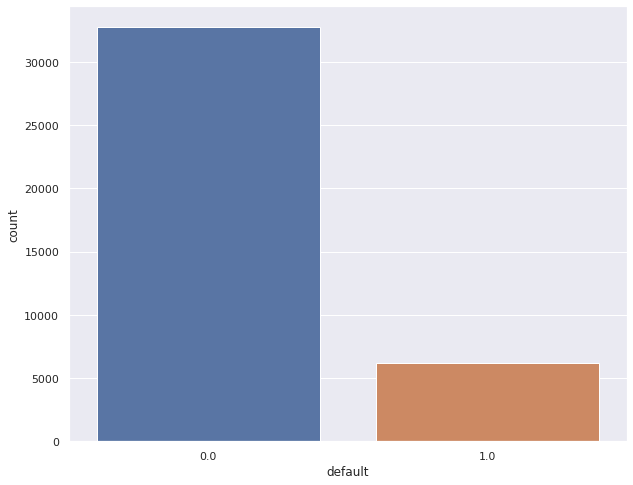

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y_train)
plt.show()

Como esperado, os dados estão desbalanceados, ou seja, existem muito mais informações sobre casos onde não houve inadimplência do que casos onde houve. Dados assim geram um modelo altamente impreciso e com muita produzir em produzir falsos negativos.

Por tanto, vamos utilizar a classe `RandomUnderSampler` do módulo `imblearn` para balancear o dataset. Depois, vamos plotar novamente o gráfico.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


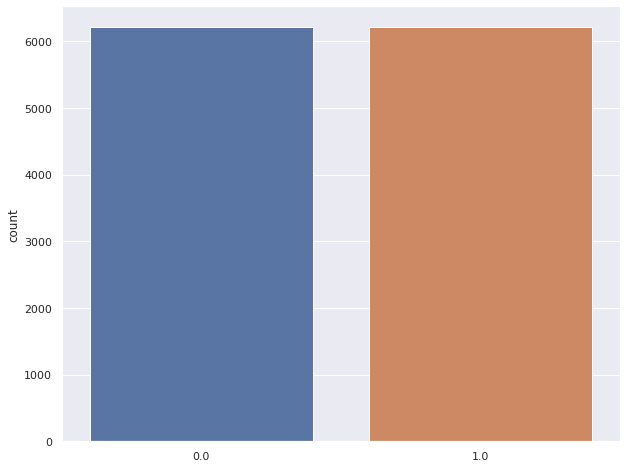

In [39]:
# Importando a classe
from imblearn.under_sampling import RandomUnderSampler

# Balanceando
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
 
# Plotando a nova distribuição 
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(y_res)
plt.show()

Com os dados balanceados, vamos treinar e avaliar o modelo.

              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79     17692
         1.0       0.29      0.67      0.41      3297

    accuracy                           0.69     20989
   macro avg       0.61      0.68      0.60     20989
weighted avg       0.82      0.69      0.73     20989



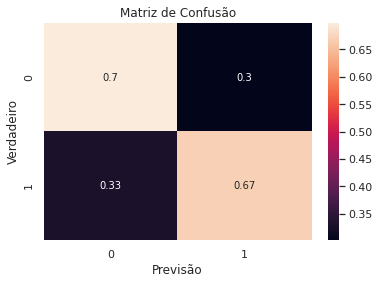

In [32]:
model = LogisticRegression(solver='liblinear')
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsão")

plt.show()

Verificamos que o modelo apresenta uma acurácia razoável, em torna de 70%. Ainda, ele performa melhor quando aponta a inexistência de fraude ou inadimplência, isto é, o número de falsos positivos é maior que o de falsos negativos.



Vamos então analisar o impacto de cada variável no modelo.

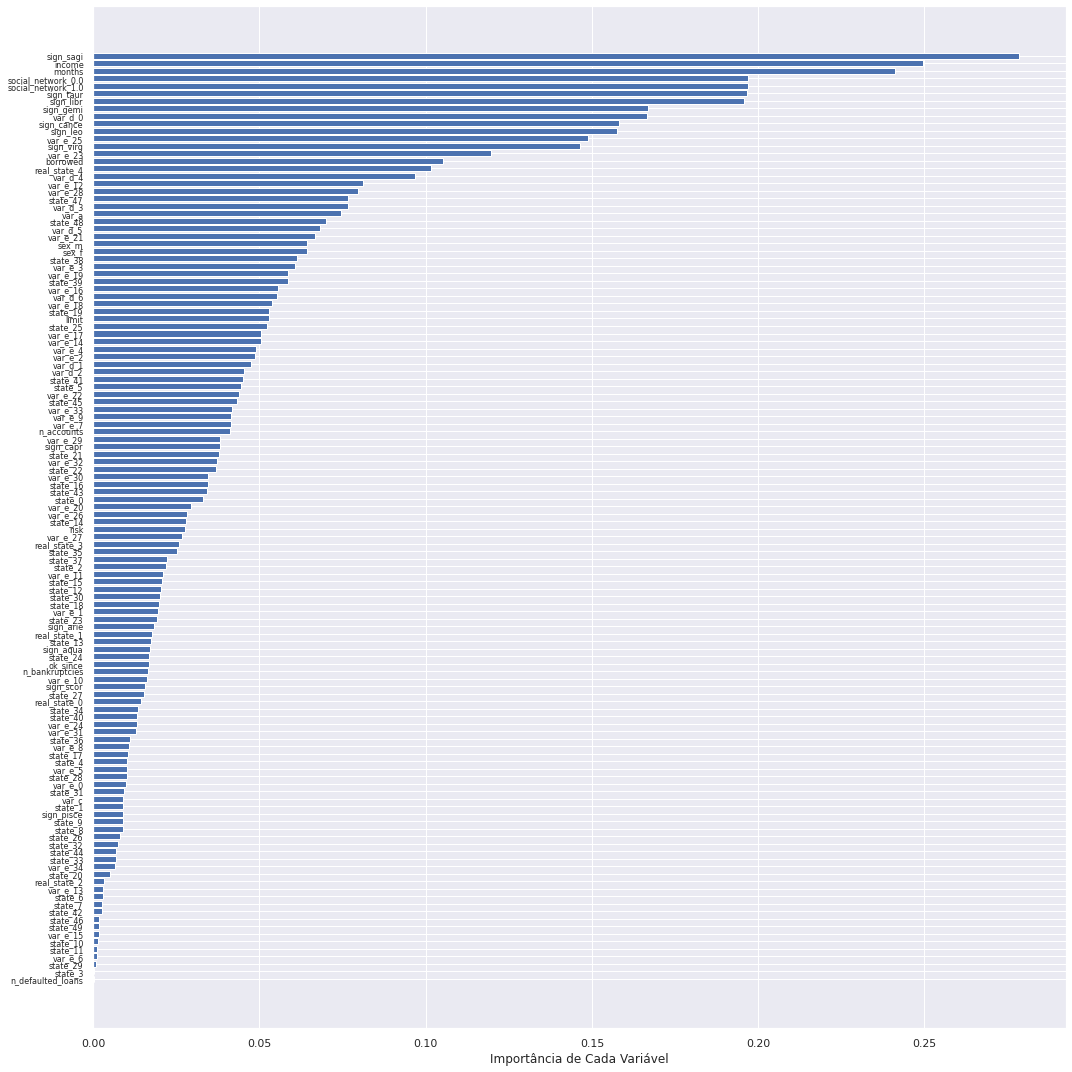

In [33]:
feature_importance = abs(model.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(15,15))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Importância de Cada Variável')

plt.tight_layout()   
plt.show()

Vamos analisar a relação das quatro variáveis com maior impacto no número de casos positivos ou negativos nos dados. Com estes resultados concluiremos o trabalho.

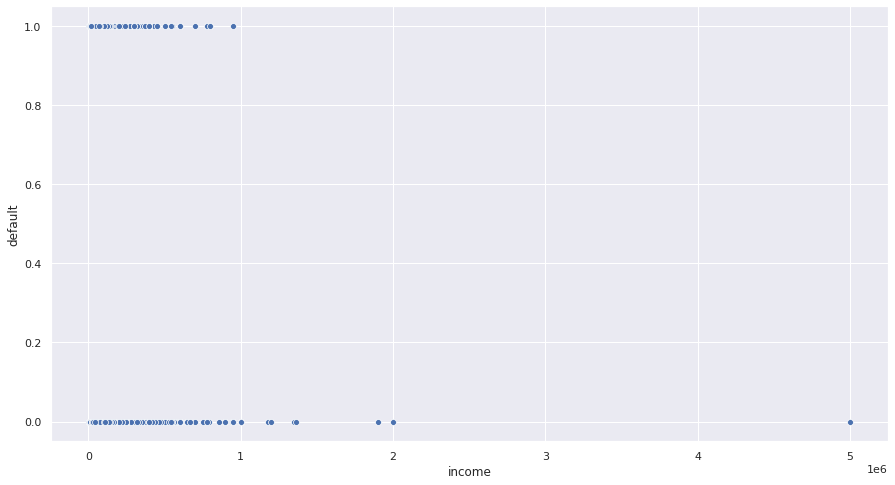

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='income', y='default', data=df_modelagem, ax=ax)

plt.show()

In [35]:
print(df_modelagem.groupby('var_d_0').default.sum())
print('\n')
print(df_modelagem.groupby('months').default.sum())
print('\n')
print(df_modelagem.groupby('sign_sagi').default.sum())

var_d_0
0    8902.0
1     608.0
Name: default, dtype: float64


months
36.0    6035.0
60.0    3475.0
Name: default, dtype: float64


sign_sagi
0    8518.0
1     992.0
Name: default, dtype: float64


#Conclusão



Neste projeto foi análisado um conjunto de dados fictício sobre fraudes/inadinplência bancária. O objetivo foi construir um modelo preditivo para identificar possíveis novas ocorrências. Para isso, passamos pela seguintes etapas:

* Análise exploratória e limpeza de dados;

* Criação e avaliação do modelo;

* Utilização do modelo em produção.



Concluímos que quatro variáveis apresentaram maior relavância no modelo. Portanto, a política da isntuição para conseção de créditos deveria se basear principalmente:



* Na renda, já que foi observado que os casos de fraude sessam a partir de um dado volume de renda. Rendas acima de um milhão, não apresentam mais fraudes, mas acima de 500 mil o número já é consideravelmente reduzido, podendo ser uma boa referência.



* Na `var_d_0`, uma vez que casos onde esta variável não está presente, o número de casos de fraude aumenta em mais de dez vezes.



* No número de meses, já que créditos de 60 meses apresentam metade do número de casos positivos do que 36 meses.



* Na variável `sign_sagi`, uma vez que quando essa variável naõ é encontrada, o numero de casos é quase 10 vezes maior.

## Apêndice - Colocando em Produção



Vamos, por fim, utilizar o modelo para prever a variável default onde essa estava ausente. Com a previsão feita, vamos unir variável com as demais e exportar o arquivo `.csv`.

In [36]:
producao = desafio[desafio['default'].isnull()]
producao.shape

(3841, 125)

In [37]:
X = producao.drop('default', axis=1)

X_prod = scaler.transform(X)

y_prod = model.predict(X_prod)

In [38]:
y_prod = pd.Series(y_prod)
X['default'] = y_prod
X.to_csv('Pevisões')